<a href="https://colab.research.google.com/github/jay10440/statistical-analysis/blob/main/Markov_Chain_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This will be just some practice problems while pacticing new skills.

#Useful Packages

In [ ]:
install.packages("markovchain")
library(markovchain)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘expm’, ‘RcppParallel’, ‘RcppArmadillo’


Package:  markovchain
Version:  0.9.5
Date:     2023-09-24 09:20:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues




#Example 1: Hurricane Strength (UBER OVERSIMPLIFIED)

I love studying hurricanes, so I'm jus gonna mess around with some super simple data. I'll ask GPT to create me a data set just to refresh my my memory on the process of creating markov chains, then we'll work on bins.

In [ ]:
#We'll come up with some random hurricane categories. We're doing this where
#cat1=weak, cat2=mid, cat3=strong, cat4=powerful, cat5=run LOL. The idea we want
#figure out here is what's the probability a hurricane will strengthen based on
#this sample provided
set.seed(123)
categories<-c("run","powerful","strong","mid","weak")
#creating a random sample:
n<-100
hurricane_samples<-sample(categories, size=n, replace=TRUE)
hurricane_samples

[1] "strong"   "strong"   "powerful" "powerful" "strong"   "weak"    
  [7] "mid"      "run"      "powerful" "strong"   "weak"     "strong"  
 [13] "strong"   "run"      "mid"      "run"      "run"      "weak"    
 [19] "strong"   "powerful" "powerful" "run"      "strong"   "mid"     
 [25] "run"      "strong"   "weak"     "mid"      "powerful" "weak"    
 [31] "run"      "run"      "powerful" "strong"   "mid"      "weak"    
 [37] "weak"     "strong"   "run"      "powerful" "weak"     "weak"    
 [43] "mid"      "weak"     "powerful" "run"      "run"      "strong"  
 [49] "run"      "weak"     "run"      "powerful" "mid"      "mid"     
 [55] "strong"   "run"      "powerful" "run"      "powerful" "mid"     
 [61] "weak"     "weak"     "strong"   "run"      "mid"      "run"     
 [67] "run"      "strong"   "mid"      "run"      "strong"   "weak"    
 [73] "strong"   "powerful" "weak"     "weak"     "strong"   "powerful"
 [79] "powerful" "powerful" "mid"      "powerful" "powerful" "mid"     
 [85] "mid"      "run"      "strong"   "strong"   "run"      "strong"  
 [91] "weak"     "powerful" "strong"   "powerful" "weak"     "weak"    
 [97] "strong"   "mid"      "mid"      "mid"

In [ ]:
#Let's create the transition matrix. I'm not doing this by hand this time!
hurricane_mc<-markovchainFit(data=hurricane_samples)
# hurricane_mc #Here's the markov chain matrix with some extra stuff in it
hurricane_transition_matrix<- hurricane_mc$estimate
hurricane_transition_matrix

MLE Fit 
 A  5 - dimensional discrete Markov Chain defined by the following states: 
 mid, powerful, run, strong, weak 
 The transition matrix  (by rows)  is defined as follows: 
               mid  powerful       run    strong      weak
mid      0.2500000 0.1250000 0.3750000 0.0625000 0.1875000
powerful 0.2000000 0.2500000 0.1500000 0.2000000 0.2000000
run      0.0952381 0.2857143 0.1904762 0.3333333 0.0952381
strong   0.1739130 0.2173913 0.2608696 0.1304348 0.2173913
weak     0.1578947 0.1052632 0.1052632 0.3684211 0.2631579


In [ ]:
#Now, taking this to n-> infinity to see if this thing settles
steadyStates(hurricane_transition_matrix)

mid,powerful,run,strong,weak
0.1724207,0.201138,0.2134359,0.2215768,0.1914285


According to this data, we bout to have some strong hurricanes LOL.

#Example 2: Earthquakes (ALSO UBER SIMPLIFIED)

Earthquakes are another fascination of mine. We'll do measured data at another time, but let's create some fictitious data and see what we get.

In [ ]:
earthquake_cats<- c("moderate","strong","major","great")
set.seed(123)
n<-100
earthquake_samples<-sample(earthquake_cats,size=n,replace=TRUE)
earthquake_samples

[1] "major"    "major"    "major"    "strong"   "major"    "strong"  
  [7] "strong"   "strong"   "major"    "moderate" "great"    "strong"  
 [13] "strong"   "moderate" "strong"   "major"    "great"    "moderate"
 [19] "major"    "major"    "moderate" "great"    "moderate" "moderate"
 [25] "moderate" "major"    "great"    "strong"   "major"    "strong"  
 [31] "moderate" "strong"   "major"    "great"    "strong"   "moderate"
 [37] "major"    "major"    "moderate" "great"    "major"    "great"   
 [43] "strong"   "moderate" "major"    "moderate" "moderate" "strong"  
 [49] "major"    "major"    "great"    "moderate" "major"    "moderate"
 [55] "major"    "great"    "strong"   "moderate" "strong"   "moderate"
 [61] "moderate" "great"    "great"    "major"    "moderate" "strong"  
 [67] "moderate" "moderate" "major"    "moderate" "strong"   "moderate"
 [73] "major"    "moderate" "major"    "strong"   "great"    "major"   
 [79] "great"    "great"    "strong"   "strong"   "major"    "great"   
 [85] "strong"   "strong"   "major"    "major"    "great"    "moderate"
 [91] "strong"   "strong"   "moderate" "strong"   "great"    "moderate"
 [97] "moderate" "strong"   "major"    "major"

In [ ]:
#creating the transition matrix:
earthquake_mc<-markovchainFit(data=earthquake_samples)
earthquake_transition_matrix<-earthquake_mc$estimate
earthquake_transition_matrix

MLE Fit 
 A  4 - dimensional discrete Markov Chain defined by the following states: 
 great, major, moderate, strong 
 The transition matrix  (by rows)  is defined as follows: 
              great     major  moderate    strong
great    0.11764706 0.1764706 0.2941176 0.4117647
major    0.32142857 0.2500000 0.2857143 0.1428571
moderate 0.14285714 0.3214286 0.2142857 0.3214286
strong   0.07692308 0.3461538 0.3461538 0.2307692


In [ ]:
#Now let's check to see whether it reaches steady state:
steadyStates(earthquake_transition_matrix)

great,major,moderate,strong
0.1717172,0.2828283,0.2828283,0.2626263


Most of our earthquakes according to this data, actually I'm not sure how to interpret this. Maybe one possible interpretation is that if we are measuring seismic activity over a period of time, we may wish to know the chance that the earthquake will strengthen within a set period of time.

#Bin Separation and Markov Chains

A lot of times, our measurement is in the form of quantitative data, as it should. We sometimes wish to take this quantitative data and categorize it and make meaningful conclusions based on the data we recieve. To do this, we can separate the data into bins first and categorize the data based on the bins they have. We'll take a look at the hurricanes and earthquakes but with some made up data that has premade bins.

#Example 3: Hurricanes Revisited

Hurricanes are typically categorized by their windspeeds, but perhaps there exists a correlation between categorizations and pressure in mb as well. So let's do both!

Taken from https://www.boatus.com/hurricanes/classifications.asp:
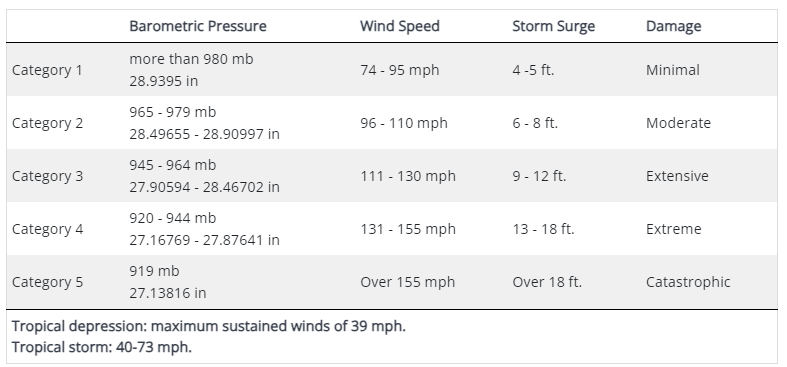

In [ ]:
#First, we'll create our data sets, one for windspeed and one for pressure.
set.seed(123)
n<-1000
windspeed_sample<-sample(seq(74,155),size=n,replace=TRUE)
pressure_sample<-sample(seq(919,1000),size=n,replace=TRUE)
#Data from,say, Wunderground will show that mb levels can exceed 1000,
#but for the sake of simple data analysis and practice, we'll cap it there.
windspeed_sample #checked, this is good.
pressure_sample #checked, this is good.

[1] 104 152 124  87 140 115 123 116  87  98 142 130  82 145  99  80 115  82
  [19] 109 151 154 116 149  88 105  80  82 114 147  96 100 133 126  80 126 100
  [37] 111 107 142 145 149 136  86 155  98 111  94 152 114 120 133  89  79 145
  [55] 112 104 154 123 107  77  86 142  98 125  95 105  98 108 113 103  85 104
  [73] 103 137  87 144 140  96 152 110  81 124 147 123 147 149 119  90 135 119
  [91] 127 108 152  97  80 152  96  99 105  80 100 115  78 143  89  97 105  94
 [109] 128 148 109 112 127  82 144 121 150 129 112 141  74 113 103  89 127 148
 [127] 121  93 140 109 125  95 122 115 132  84 128  81 119 139 150 119 143 145
 [145] 117 105 109 118  87  89 106 113 113  83 145 155  82  80  80 131 134 147
 [163]  97 136 127  96  99 106 130 102  83 126 127 150  84  98 125  99  80  98
 [181] 105  97 130 146  96  87  79  74 131 154 102  99 100  80 133  99 114  79
 [199] 104  90 137 110 130  93 108 106 139  77 147  78  98  81 128 118  91 115
 [217] 104  79 144 134 121  90 118 136 126 126 136 144 155  90  75 122  75  86
 [235]  97 122 140 155  75 110 136 149  86 115 134 143 111 137 153 109 108 140
 [253] 121 139  96 140  82 134 112 104 146 109  95 117 114 116 112 110 106  85
 [271]  94 154 149 108 103 123 120 140 155 154 115 113 115  99  86  93  93 114
 [289]  81 112 147 154 136 155  84  75  92 150  86 104 103  95 147  89 142 109
 [307] 123 106 153 101 122  85 126 101 139 123 149 120 124  79 153  88  92 132
 [325]  76 106 121 148 118  83 115  97  91 154 132  82 126  84  81  78 102 123
 [343] 143 147  99 146  84  79 149 129 100 141 101 140 113  79 109 128 121  83
 [361]  98 111  98  77 152 125  95  97 112 120 133 136 110 119 127 120 152  89
 [379]  92 145 104 110 121 133 135 153  82  84 116 103 134 147 128 134 107 130
 [397] 111 136 119 151 143  91  75 145 148  94 130 144 145 132 147 110 154 128
 [415]  79 113  79 101 105 122 138 142 148 120  93  75 135 136 135  83 132 122
 [433]  80 134 111 109  96 107  77 127 102 131 148 129 124 123 121  76 106 107
 [451] 139 137 113 131  93 151  98 144 113 134  95 153 129 106 137 126 104 119
 [469] 145  97 133 103  96  90 132 130 116  96 118  81 152 109 140 112 106 111
 [487] 101 154 126  83 114  81  74 153 139 151  85 145 114  81 130 146 125 140
 [505] 113  75 138 146  80 150 102  93 151 153  80 118 149  98  86  83 114  85
 [523]  81 144  88 122 112 108  79 144  77 147 154 121  81 126 140 126  87 101
 [541]  79  82 106 119 137  92  74 125 141 148  78  92 108 106 142 134  96 114
 [559] 136 122 142 137 149  75  91  77 145 138 148  84 152 152 130 129  88 152
 [577] 125 134 109  76  80 141 126  97 141 140  84 147  78 105  84 147 152 133
 [595] 104 147 118 132  97 108  83 137 145 117 115 105 112  80 111  90 106 147
 [613] 147  75 152 139 143 132 120  82  96  98  88 145  94 121 146 116 129 148
 [631]  77 144 129 123  84 148 133 147 140 131 113  86  81  75  79  90 105 151
 [649] 144 150 145 148  90 144 128  92  88 119  87 100 154 106 123  91  93 115
 [667] 147 126 136 146 104 128  91 117  94 102 109  96 115 142 139 155 149 135
 [685] 137 150 124  91  83 146 145  75 116  78 100  96  76  88 131  80 107 104
 [703] 155  91 119  82 152  90  80  81 138  82  98  75  84 141 113  93  84  91
 [721] 127  87 140 140 112  96 152 113 106 110 133 102 143  98 115  99 117  81
 [739]  89 112 138 131 129 116 140 129  95  90  87 137  97  81  93 147 123  90
 [757]  82 108 136 130  89 125 108 127  99  86 109 120  98 101 102 150 117 127
 [775]  98 102  93  86 150 108 128  78 129 150 117 145 111  97 153 148 121  88
 [793] 138 127  83 115 114  98 125 110 100 146 108 107 136 149 152 122 108 102
 [811] 144 118 107 146 120  74  83 114 114 112  79 105 134 153  89  75 107 151
 [829] 103 101 131 103 112 143 141 140 119 132 121  83 101 149 140  74 117 122
 [847] 106 109  86 152 150 119  91 123  99 109 109 129 130  76  84 124 103  89
 [865]  84 139  95  90  78 152 135 108  95 136  88 108 103 107 142 142 144  75
 [883] 153  96  94 155  92  82 135 142 118 153 105 121  88  99  93 108 128 104
 [901]  97  90 144 130 150 108 131 127  86 151 141  9

[1]  925  987  928  954  926  967  987  957  940  994  928  980  983  965
  [15]  932  989  981  952  992  997  937 1000  940  936  969  985  970  981
  [29]  955  936  959  983  957  933  967  988  958  992  978  952  936  987
  [43]  978  953  988  972  961  991  940  938  965  959  932  947  929  978
  [57]  938  999  969  931  994  924  985  962  929  937  929  981  940  929
  [71]  945  920  924  973  966  946  947  986  959  923  927  946  933  978
  [85]  993  935  979  959  943  994  937  970  989  929  933  991  929  951
  [99]  991  941  935  928  990  936  942  968  989  930  998  921  949  939
 [113]  980  952  946  954  944  919  939  960  953  930  931  968  982  951
 [127]  942  927  949  984  949  978  941  955  992  961  937  934  957  968
 [141]  937  922  969  953  952  947  995  972  985  971  958  923  923  989
 [155]  935  935  979  929  932  951  952  982  928  956  995  930  953  977
 [169]  951  961  929  990  999  922  994  965  974  932  969  945  993  967
 [183]  947  956  937  939  967  924  987  934  991  996  980  987  948  980
 [197]  963  986  986  970  988  960  938  999  993  958  939  976  961  919
 [211]  952  994  932  985  966  938  922  922  983  999  954  935  957  977
 [225]  987  927  949  988  959  949  953  991  967  956 1000  935  995  965
 [239]  971  934  933  940  926  983  988  988  923  927  949  985  959  950
 [253]  971  941 1000  976  941  943  956  948  956  922  999  988  944  957
 [267]  945  980  993  939  990  935  996  942  925  985  951  997  942  964
 [281]  945  930  967  926  923  995  944  938  947  974  927  998  967  968
 [295]  960  991  929  983  993  980  996  932  955  928  967  970  989  940
 [309]  962  929  936  930  989  921  977  964 1000  981  967  988  948  988
 [323]  954  971  947  955  979  960  972  960  973  980  964  947  969  950
 [337]  919  952  997  928  987  923  973  999  920  945  980  929  982  999
 [351]  981  960  931  982  975  949  969  935  991  968  991  980  977  976
 [365]  965  950  984  919  936  989  989  954  987  993  945  960  993  946
 [379]  951  950  962  980  955  958  997  989  932  974  966  921  941  993
 [393]  979  980  985  926  978  967  946  946  995  997  962  969  969  949
 [407]  995  959  993  975  964  969  978  980  973  940  942  930  962  938
 [421]  979  998  967  962  984  955  937  995  974  923  989  934  974  944
 [435]  963  956  928  958  928  956  969  947  972  984  982  937  937  995
 [449]  951  956  982  955  989  944  999  965  955  950  963  958  954  974
 [463]  968  986  958  946  974  972  973  954 1000  964  946  930  929  948
 [477]  929  935  941  992  972  922  988  992  959  966  991  925  969  942
 [491] 1000  990  982  978  934  965 1000  947  979  980  943  998  987  941
 [505]  985  988  937  929  930  980  990  989  997  925  931  991  930  996
 [519]  991  954  952  979  974  994  932  992  934  992  984  939  926  951
 [533]  997  936  934  922  957  980  954  941  990  937  989  994  984  936
 [547]  975  966  941  929  920  964  935  940  995  943  973  991  978  953
 [561]  960  994  933  933  954  943  959  923  996  999  920  969  993  951
 [575]  925  933  929  966  943  928  946  924  930  937  953  926  973  966
 [589]  920  995  971  949  993  993  947  951  945  943  990  974  958  981
 [603]  990  998  928  933  960  942  958  920  936  993  920  978  937  984
 [617]  959  923  924  999  945  930  997  932  920  998  933  979  992  942
 [631]  921  952  961  958  977  948  934  927  975  982  965  995  973 1000
 [645]  962  991  976  991  966  987  958  980 1000  924  940  956  954  933
 [659]  967  945  990  975  932  990  921  982  960  937  949  962  988  944
 [673]  947  957  939  975  922  928  998  973  998  953  957  948  939  956
 [687]  920  964  954  972  928  955  962  986  925  929  920  931  950  929
 [701]  958  958  924  923  947  966  978  983  928  920  981  995  933  988
 [715]  979  933  967  953  975  968  992  994  926  926  922  933  999  952

In [ ]:
#We now want to organize these into bins. Defining the bins (but keeping them separate for no confusion)
windspeed_hcats<-c("wcat1","wcat2","wcat3","wcat4","wcat5")
pressure_hcats<-c("pcat1","pcat2","pcat3","pcat4","pcat5")
#now separating these into bins
categorywindspeeds<- function(amount){
  if (amount<96) {return("wcat1")}
  else if (amount<111) {return("wcat2")}
  else if (amount<131) {return("wcat3")}
  else if (amount<156) {return("wcat4")}
  else {return("wcat5")}
}
windspeed_cats<-sapply(windspeed_sample,categorywindspeeds)
# windspeed_cats checked, is good. now for pressure
categorypressure<- function(amount){
  if (amount<919) {return("pcat5")}
  else if (amount<945) {return("pcat4")}
  else if (amount<965) {return("pcat3")}
  else if (amount<980) {return("pcat2")}
  else {return("pcat1")}
}
pressure_cats<-sapply(pressure_sample, categorypressure)
pressure_cats

[1] "pcat4" "pcat1" "pcat4" "pcat3" "pcat4" "pcat2" "pcat1" "pcat3" "pcat4"
  [10] "pcat1" "pcat4" "pcat1" "pcat1" "pcat2" "pcat4" "pcat1" "pcat1" "pcat3"
  [19] "pcat1" "pcat1" "pcat4" "pcat1" "pcat4" "pcat4" "pcat2" "pcat1" "pcat2"
  [28] "pcat1" "pcat3" "pcat4" "pcat3" "pcat1" "pcat3" "pcat4" "pcat2" "pcat1"
  [37] "pcat3" "pcat1" "pcat2" "pcat3" "pcat4" "pcat1" "pcat2" "pcat3" "pcat1"
  [46] "pcat2" "pcat3" "pcat1" "pcat4" "pcat4" "pcat2" "pcat3" "pcat4" "pcat3"
  [55] "pcat4" "pcat2" "pcat4" "pcat1" "pcat2" "pcat4" "pcat1" "pcat4" "pcat1"
  [64] "pcat3" "pcat4" "pcat4" "pcat4" "pcat1" "pcat4" "pcat4" "pcat3" "pcat4"
  [73] "pcat4" "pcat2" "pcat2" "pcat3" "pcat3" "pcat1" "pcat3" "pcat4" "pcat4"
  [82] "pcat3" "pcat4" "pcat2" "pcat1" "pcat4" "pcat2" "pcat3" "pcat4" "pcat1"
  [91] "pcat4" "pcat2" "pcat1" "pcat4" "pcat4" "pcat1" "pcat4" "pcat3" "pcat1"
 [100] "pcat4" "pcat4" "pcat4" "pcat1" "pcat4" "pcat4" "pcat2" "pcat1" "pcat4"
 [109] "pcat1" "pcat4" "pcat3" "pcat4" "pcat1" "pcat3" "pcat3" "pcat3" "pcat4"
 [118] "pcat4" "pcat4" "pcat3" "pcat3" "pcat4" "pcat4" "pcat2" "pcat1" "pcat3"
 [127] "pcat4" "pcat4" "pcat3" "pcat1" "pcat3" "pcat2" "pcat4" "pcat3" "pcat1"
 [136] "pcat3" "pcat4" "pcat4" "pcat3" "pcat2" "pcat4" "pcat4" "pcat2" "pcat3"
 [145] "pcat3" "pcat3" "pcat1" "pcat2" "pcat1" "pcat2" "pcat3" "pcat4" "pcat4"
 [154] "pcat1" "pcat4" "pcat4" "pcat2" "pcat4" "pcat4" "pcat3" "pcat3" "pcat1"
 [163] "pcat4" "pcat3" "pcat1" "pcat4" "pcat3" "pcat2" "pcat3" "pcat3" "pcat4"
 [172] "pcat1" "pcat1" "pcat4" "pcat1" "pcat2" "pcat2" "pcat4" "pcat2" "pcat3"
 [181] "pcat1" "pcat2" "pcat3" "pcat3" "pcat4" "pcat4" "pcat2" "pcat4" "pcat1"
 [190] "pcat4" "pcat1" "pcat1" "pcat1" "pcat1" "pcat3" "pcat1" "pcat3" "pcat1"
 [199] "pcat1" "pcat2" "pcat1" "pcat3" "pcat4" "pcat1" "pcat1" "pcat3" "pcat4"
 [208] "pcat2" "pcat3" "pcat4" "pcat3" "pcat1" "pcat4" "pcat1" "pcat2" "pcat4"
 [217] "pcat4" "pcat4" "pcat1" "pcat1" "pcat3" "pcat4" "pcat3" "pcat2" "pcat1"
 [226] "pcat4" "pcat3" "pcat1" "pcat3" "pcat3" "pcat3" "pcat1" "pcat2" "pcat3"
 [235] "pcat1" "pcat4" "pcat1" "pcat2" "pcat2" "pcat4" "pcat4" "pcat4" "pcat4"
 [244] "pcat1" "pcat1" "pcat1" "pcat4" "pcat4" "pcat3" "pcat1" "pcat3" "pcat3"
 [253] "pcat2" "pcat4" "pcat1" "pcat2" "pcat4" "pcat4" "pcat3" "pcat3" "pcat3"
 [262] "pcat4" "pcat1" "pcat1" "pcat4" "pcat3" "pcat3" "pcat1" "pcat1" "pcat4"
 [271] "pcat1" "pcat4" "pcat1" "pcat4" "pcat4" "pcat1" "pcat3" "pcat1" "pcat4"
 [280] "pcat3" "pcat3" "pcat4" "pcat2" "pcat4" "pcat4" "pcat1" "pcat4" "pcat4"
 [289] "pcat3" "pcat2" "pcat4" "pcat1" "pcat2" "pcat2" "pcat3" "pcat1" "pcat4"
 [298] "pcat1" "pcat1" "pcat1" "pcat1" "pcat4" "pcat3" "pcat4" "pcat2" "pcat2"
 [307] "pcat1" "pcat4" "pcat3" "pcat4" "pcat4" "pcat4" "pcat1" "pcat4" "pcat2"
 [316] "pcat3" "pcat1" "pcat1" "pcat2" "pcat1" "pcat3" "pcat1" "pcat3" "pcat2"
 [325] "pcat3" "pcat3" "pcat2" "pcat3" "pcat2" "pcat3" "pcat2" "pcat1" "pcat3"
 [334] "pcat3" "pcat2" "pcat3" "pcat4" "pcat3" "pcat1" "pcat4" "pcat1" "pcat4"
 [343] "pcat2" "pcat1" "pcat4" "pcat3" "pcat1" "pcat4" "pcat1" "pcat1" "pcat1"
 [352] "pcat3" "pcat4" "pcat1" "pcat2" "pcat3" "pcat2" "pcat4" "pcat1" "pcat2"
 [361] "pcat1" "pcat1" "pcat2" "pcat2" "pcat2" "pcat3" "pcat1" "pcat4" "pcat4"
 [370] "pcat1" "pcat1" "pcat3" "pcat1" "pcat1" "pcat3" "pcat3" "pcat1" "pcat3"
 [379] "pcat3" "pcat3" "pcat3" "pcat1" "pcat3" "pcat3" "pcat1" "pcat1" "pcat4"
 [388] "pcat2" "pcat2" "pcat4" "pcat4" "pcat1" "pcat2" "pcat1" "pcat1" "pcat4"
 [397] "pcat2" "pcat2" "pcat3" "pcat3" "pcat1" "pcat1" "pcat3" "pcat2" "pcat2"
 [406] "pcat3" "pcat1" "pcat3" "pcat1" "pcat2" "pcat3" "pcat2" "pcat2" "pcat1"
 [415] "pcat2" "pcat4" "pcat4" "pcat4" "pcat3" "pcat4" "pcat2" "pcat1" "pcat2"
 [424] "pcat3" "pcat1" "pcat3" "pcat4" "pcat1" "pcat2" "pcat4" "pcat1" "pcat4"
 [433] "pcat2" "pcat4" "pcat3" "pcat3" "pcat4" "pcat3" "pcat4" "pcat3" "pcat2"
 [442] "pcat3" "pcat2" "pcat1" "pcat1" "pcat4" "pcat4" "pcat1" "pcat3" "pcat3"
 [451] "pcat1" "pcat3" "pcat1" "pcat4" "pcat1" "pcat2

In [ ]:
#Now time for the data analysis! We can initiate the markov chains!
hurricanewsmc<-markovchainFit(data=windspeed_cats)
hurricane_windspeed_transition<-hurricanewsmc$estimate
hurricane_windspeed_transition

hurricanepmc<-markovchainFit(data=pressure_cats)
hurricane_pressure_transition<-hurricanepmc$estimate
hurricane_pressure_transition

MLE Fit 
 A  4 - dimensional discrete Markov Chain defined by the following states: 
 wcat1, wcat2, wcat3, wcat4 
 The transition matrix  (by rows)  is defined as follows: 
          wcat1     wcat2     wcat3     wcat4
wcat1 0.2579365 0.1984127 0.2261905 0.3174603
wcat2 0.2243902 0.2439024 0.2487805 0.2829268
wcat3 0.3333333 0.2166667 0.1750000 0.2750000
wcat4 0.2019868 0.1721854 0.3013245 0.3245033


MLE Fit 
 A  4 - dimensional discrete Markov Chain defined by the following states: 
 pcat1, pcat2, pcat3, pcat4 
 The transition matrix  (by rows)  is defined as follows: 
          pcat1     pcat2     pcat3     pcat4
pcat1 0.2517986 0.1762590 0.2374101 0.3345324
pcat2 0.2758621 0.2011494 0.2413793 0.2816092
pcat3 0.2597403 0.1904762 0.2380952 0.3116883
pcat4 0.3164557 0.1455696 0.2183544 0.3196203


In [ ]:
#Awesome, now the steady states:
steadyStates(hurricane_windspeed_transition)
steadyStates(hurricane_pressure_transition)

wcat1,wcat2,wcat3,wcat4
0.2523572,0.2041744,0.2411701,0.3022984


pcat1,pcat2,pcat3,pcat4
0.2782221,0.1742209,0.2322524,0.3153046


#Example 4: Seismic Activity Revisited

We will refine our approach for dealing with earthquake evolution, similar to the hurricane approach. From: https://www.britannica.com/science/earthquake-geology/Earthquake-magnitude

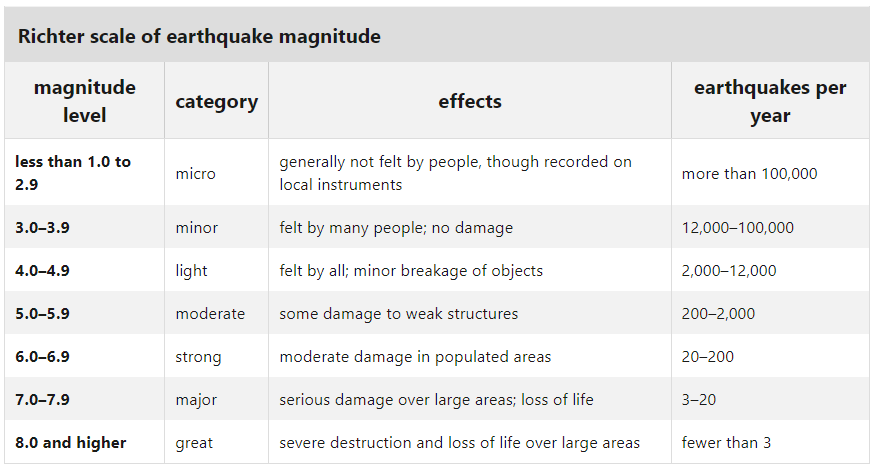

In [25]:
#Creating some data:
n<-1000
earthquake_samples<-sample(seq(0,9), size=n, replace=TRUE)
earthquake_samples

[1] 4 3 6 0 8 5 6 9 6 6 8 3 9 2 8 6 0 3 8 0 4 0 6 4 0 7 0 3 6 2 6 4 5 5 2 6 9
  [38] 2 4 3 2 3 9 7 3 0 9 8 8 4 4 6 4 7 5 0 5 1 3 5 4 2 0 9 3 9 3 9 7 5 7 9 5 3
  [75] 6 7 4 9 3 6 8 3 4 0 1 7 6 4 4 3 5 6 2 3 8 3 5 3 6 2 7 5 1 1 5 6 2 2 7 8 8
 [112] 2 1 6 4 1 9 2 1 2 5 6 5 3 0 3 9 5 2 7 7 5 3 9 1 5 9 9 6 0 7 4 4 0 0 0 4 3
 [149] 5 1 8 2 2 1 7 3 7 0 4 5 1 4 6 7 4 2 4 3 5 3 9 7 6 6 8 5 4 4 2 0 9 5 2 9 6
 [186] 7 9 7 3 1 3 5 6 1 4 0 1 6 9 6 9 7 4 9 2 6 7 8 7 1 9 8 9 6 6 3 1 9 0 6 0 3
 [223] 3 5 3 8 0 8 7 9 0 0 9 6 4 0 7 4 4 4 0 9 6 6 3 5 1 0 1 0 8 2 3 5 5 8 8 2 8
 [260] 9 7 5 6 3 7 9 4 1 5 8 5 2 7 2 1 5 7 6 3 0 9 7 9 9 1 3 5 1 0 4 2 5 2 9 8 3
 [297] 9 2 3 5 5 6 1 7 3 0 7 5 1 9 9 8 8 2 1 5 8 2 7 0 1 1 6 4 5 4 4 3 3 7 8 0 9
 [334] 3 9 7 1 7 6 1 4 8 9 9 0 5 7 7 1 6 7 7 9 7 4 3 9 8 7 5 7 3 9 2 4 0 1 5 2 1
 [371] 7 9 0 9 5 7 4 8 8 1 7 5 5 4 1 7 3 3 3 8 7 9 3 0 1 7 5 6 1 9 3 4 2 3 2 1 3
 [408] 1 0 9 3 3 9 5 4 1 3 5 1 4 2 8 4 3 2 4 1 7 8 7 7 2 1 3 5 0 5 9 3 1 3 5 5 3
 [445] 4 4 9 9 3 6 6 7 6 6 7 2 5 8 1 7 1 0 7 9 9 3 8 4 2 8 3 0 8 5 9 5 3 8 4 1 1
 [482] 1 7 4 8 2 5 4 1 8 3 4 0 0 1 9 9 9 6 4 6 4 3 1 4 2 2 5 0 2 4 1 7 9 4 2 7 4
 [519] 2 3 3 0 3 6 8 5 4 5 2 0 6 0 9 1 2 8 3 0 6 3 1 9 2 3 3 8 1 7 2 9 4 1 3 9 4
 [556] 6 1 1 9 4 8 8 0 8 1 5 1 8 4 8 7 3 2 4 7 2 0 2 1 4 1 1 9 5 5 0 2 6 6 2 9 1
 [593] 3 4 0 7 9 8 2 4 7 9 2 0 0 1 9 7 8 2 9 0 1 2 5 2 9 7 1 2 4 8 9 9 0 8 2 3 0
 [630] 0 5 9 6 6 9 1 4 3 8 6 6 6 6 4 8 7 8 2 5 2 1 1 5 4 9 5 0 7 6 8 6 3 1 9 0 0
 [667] 5 1 9 9 1 0 1 7 7 5 1 4 9 7 1 6 4 3 8 9 1 3 0 9 2 9 9 0 4 3 5 3 8 3 6 4 4
 [704] 7 2 1 6 3 1 2 2 4 4 3 1 1 5 2 5 6 9 1 9 1 6 1 0 7 5 1 8 3 5 5 8 6 8 7 6 3
 [741] 8 5 8 1 8 8 1 8 7 9 8 9 1 1 9 4 9 1 3 5 3 3 9 3 7 4 1 1 3 0 0 7 1 8 5 7 7
 [778] 8 9 1 9 2 7 6 2 1 2 1 8 1 0 2 3 9 2 5 4 3 7 3 6 0 1 7 2 4 3 8 2 0 3 8 0 5
 [815] 4 1 6 8 6 3 3 9 9 0 8 3 7 5 0 6 0 2 5 7 1 7 1 3 0 5 3 7 6 9 9 1 4 1 3 7 0
 [852] 5 7 2 5 5 1 5 6 4 0 5 3 1 3 3 0 9 5 8 0 1 6 5 6 1 4 5 9 7 6 5 3 0 1 0 4 7
 [889] 8 0 0 9 9 1 8 3 8 0 3 8 1 0 8 6 5 2 6 7 3 0 0 8 3 4 2 8 7 0 5 4 8 9 8 4 0
 [926] 3 3 1 9 4 2 4 5 0 9 6 1 8 3 1 9 6 2 7 2 4 2 5 6 4 7 7 2 9 0 3 3 3 8 4 6 4
 [963] 0 3 1 0 9 1 3 3 9 1 7 5 2 3 1 0 1 7 4 6 1 4 8 6 8 7 8 9 0 9 6 0 4 2 1 6 2
[1000] 1

In [26]:
#Preparing the categories and sorting:
earthquake_categories<-c("micro","minor","light","moderate","strong","major","great")
earthquake_sorter<- function(amount){
  if (amount<3) {return("micro")}
  else if (amount<4) {return("minor")}
  else if (amount<5) {return("light")}
  else if (amount<6) {return("moderate")}
  else if (amount<7) {return("strong")}
  else if (amount<8) {return("major")}
  else {return("great")}
}

earthquake_categorized<- sapply(earthquake_samples, earthquake_sorter)
earthquake_categorized

[1] "light"    "minor"    "strong"   "micro"    "great"    "moderate"
   [7] "strong"   "great"    "strong"   "strong"   "great"    "minor"   
  [13] "great"    "micro"    "great"    "strong"   "micro"    "minor"   
  [19] "great"    "micro"    "light"    "micro"    "strong"   "light"   
  [25] "micro"    "major"    "micro"    "minor"    "strong"   "micro"   
  [31] "strong"   "light"    "moderate" "moderate" "micro"    "strong"  
  [37] "great"    "micro"    "light"    "minor"    "micro"    "minor"   
  [43] "great"    "major"    "minor"    "micro"    "great"    "great"   
  [49] "great"    "light"    "light"    "strong"   "light"    "major"   
  [55] "moderate" "micro"    "moderate" "micro"    "minor"    "moderate"
  [61] "light"    "micro"    "micro"    "great"    "minor"    "great"   
  [67] "minor"    "great"    "major"    "moderate" "major"    "great"   
  [73] "moderate" "minor"    "strong"   "major"    "light"    "great"   
  [79] "minor"    "strong"   "great"    "minor"    "light"    "micro"   
  [85] "micro"    "major"    "strong"   "light"    "light"    "minor"   
  [91] "moderate" "strong"   "micro"    "minor"    "great"    "minor"   
  [97] "moderate" "minor"    "strong"   "micro"    "major"    "moderate"
 [103] "micro"    "micro"    "moderate" "strong"   "micro"    "micro"   
 [109] "major"    "great"    "great"    "micro"    "micro"    "strong"  
 [115] "light"    "micro"    "great"    "micro"    "micro"    "micro"   
 [121] "moderate" "strong"   "moderate" "minor"    "micro"    "minor"   
 [127] "great"    "moderate" "micro"    "major"    "major"    "moderate"
 [133] "minor"    "great"    "micro"    "moderate" "great"    "great"   
 [139] "strong"   "micro"    "major"    "light"    "light"    "micro"   
 [145] "micro"    "micro"    "light"    "minor"    "moderate" "micro"   
 [151] "great"    "micro"    "micro"    "micro"    "major"    "minor"   
 [157] "major"    "micro"    "light"    "moderate" "micro"    "light"   
 [163] "strong"   "major"    "light"    "micro"    "light"    "minor"   
 [169] "moderate" "minor"    "great"    "major"    "strong"   "strong"  
 [175] "great"    "moderate" "light"    "light"    "micro"    "micro"   
 [181] "great"    "moderate" "micro"    "great"    "strong"   "major"   
 [187] "great"    "major"    "minor"    "micro"    "minor"    "moderate"
 [193] "strong"   "micro"    "light"    "micro"    "micro"    "strong"  
 [199] "great"    "strong"   "great"    "major"    "light"    "great"   
 [205] "micro"    "strong"   "major"    "great"    "major"    "micro"   
 [211] "great"    "great"    "great"    "strong"   "strong"   "minor"   
 [217] "micro"    "great"    "micro"    "strong"   "micro"    "minor"   
 [223] "minor"    "moderate" "minor"    "great"    "micro"    "great"   
 [229] "major"    "great"    "micro"    "micro"    "great"    "strong"  
 [235] "light"    "micro"    "major"    "light"    "light"    "light"   
 [241] "micro"    "great"    "strong"   "strong"   "minor"    "moderate"
 [247] "micro"    "micro"    "micro"    "micro"    "great"    "micro"   
 [253] "minor"    "moderate" "moderate" "great"    "great"    "micro"   
 [259] "great"    "great"    "major"    "moderate" "strong"   "minor"   
 [265] "major"    "great"    "light"    "micro"    "moderate" "great"   
 [271] "moderate" "micro"    "major"    "micro"    "micro"    "moderate"
 [277] "major"    "strong"   "minor"    "micro"    "great"    "major"   
 [283] "great"    "great"    "micro"    "minor"    "moderate" "micro"   
 [289] "micro"    "light"    "micro"    "moderate" "micro"    "great"   
 [295] "great"    "minor"    "great"    "micro"    "minor"    "moderate"
 [301] "moderate" "strong"   "micro"    "major"    "minor"    "micro"   
 [307] "major"    "moderate" "micro"    "great"    "great"    "great"   
 [313] "great"    "micro"    "micro"    "moderate" "great"    "micro"   
 [319] "major"    "micro"    "micro"    "micro"    "strong"   "light"   
 [325] "moderate" "light"    "light"    "minor"    "minor"   

In [27]:
#Proceeding to the Markov Chain
earthquakemc<- markovchainFit(data=earthquake_categorized)
earthquake_transition<-earthquakemc$estimate
earthquake_transition

MLE Fit 
 A  7 - dimensional discrete Markov Chain defined by the following states: 
 great, light, major, micro, minor, moderate, strong 
 The transition matrix  (by rows)  is defined as follows: 
             great      light      major     micro     minor   moderate
great    0.1890547 0.06965174 0.11940299 0.3283582 0.1194030 0.07960199
light    0.1530612 0.10204082 0.06122449 0.4081633 0.1530612 0.06122449
major    0.2291667 0.11458333 0.07291667 0.2500000 0.0937500 0.13541667
micro    0.2192691 0.09966777 0.11627907 0.2724252 0.1196013 0.10631229
minor    0.2750000 0.05000000 0.06666667 0.2750000 0.1166667 0.14166667
moderate 0.1250000 0.11458333 0.08333333 0.3333333 0.1354167 0.08333333
strong   0.1724138 0.17241379 0.09195402 0.2873563 0.1034483 0.04597701
             strong
great    0.09452736
light    0.06122449
major    0.10416667
micro    0.06644518
minor    0.07500000
moderate 0.12500000
strong   0.12643678


In [28]:
#Checking to see if it reaches steady state:
steadyStates(earthquake_transition)

great,light,major,micro,minor,moderate,strong
0.2012598,0.09709694,0.09614912,0.3021712,0.1200858,0.09613832,0.08709884


From this data, it seems that earthquakes have the highest chance of being greats and micros. Interesting.

From https://www.usgs.gov/programs/earthquake-hazards/lists-maps-and-statistics , it's interesting to see what earthquakes worldwide occurred most frequently. Perhaps the next thing we will do is take that data and run time series analysis on it to see if there are any trends!